In [197]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [198]:
df_train = pd.read_csv('C:/Users/user/Desktop/newww/house-prj/DH_train.csv')

In [199]:
df_train['log_SalePrice'] = np.log(df_train['SalePrice'])
# df_train['LotArea'] = np.log(df_train['LotArea'])
# df_train['LotFrontage'] = np.log(df_train['LotFrontage'])
# df_train['1stFlrSF'] = np.log(df_train['1stFlrSF'])
# df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

In [200]:
# report 확인
def LinearRegR(data, formula):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    print(result.summary())
    return result
    

# 예측치와 추정치 결과 확인 (위치도 출력)
# plot_leverage_resid2, influence_plot 확인
def LinearReg(data, formula):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    predict = result.predict(data).values

    y = formula.split("~")[0].strip()
    target = data[y].values
    plt.scatter(target, predict)
    
    
def LinearRegO(data, formula, num_param):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    predict = result.predict(data).values

    y = formula.split("~")[0].strip()
    target = data[y].values

#     ax = plt.subplot()
#     plt.scatter(target, predict)
#     cook_d2, pvals = result.get_influence().cooks_distance
#     fox_cr = 4 / (len(y) - num_param)
#     idx = np.where(cook_d2 > fox_cr)[0]
#     plt.scatter(target[idx], predict[idx], s=300, c="r", alpha=0.5)
#     utils.annotate_axes(range(len(idx)), idx, 
#                     list(zip(target[idx], predict[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
    
    
    sm.graphics.influence_plot(result)
    
def LinearRegExo(data, formula, column):
    model = sm.OLS.from_formula(formula, data)
    result = model.fit()
    
    fig = sm.graphics.plot_regress_exog(result, column)
    fig.set_size_inches(10, 10)
# 그래프 보기( 잔차 ) / 컬럼 값이 입력
# plot_regress_exog(fitting plit, residal-x, partial, CCPR)

In [201]:
def makeFormula(target, numeric=None, categoric=None, noInter = False):
    formula = ""
    formula += target
    formula += "~"
    
    if(numeric != None):
        formula_numeric = "+".join(numeric)
        formula += formula_numeric 
    
    if(numeric != None and categoric != None):
        formula += "+"
    
    if(categoric != None):
        categoric = list(map(lambda c :  "C(" + c + ")", categoric))
        formula_categoric = "+".join(categoric)
        formula += formula_categoric
        formula += "+0"
    
    if(noInter == True):
        formula +="+0"
    
    return formula

In [202]:
def makeScaleFormula(target, scale=None, non_scale=None, noInter = False):
    formula = ""
    formula += target
    formula += "~"
    
    if(scale != None):
        scale = list(map(lambda c :  "scale(" + c + ")", scale))
        formula_scale = "+".join(scale)
        formula += formula_scale 
    
    if(scale != None and non_scale != None):
        formula += "+"
    
    if(non_scale != None):
        formula_non_scale = "+".join(non_scale)
        formula += formula_non_scale
    
    if(noInter == True):
        formula +="+0"
    
    return formula

In [203]:
rename_dict = {"2ndFlrSF":"SecondFlrSF", "3SsnPorch":"ThreeSsnPorch", "1stFlrSF":"FirstFlrSF",
              "MSZoning_C (all)":"MSZoning_all", "Exterior1st_Wd Sdng":"Exterior1st_WdSdng",
              "Exterior2nd_Brk Cmn":"Exterior2nd_BrkCmn", "Exterior2nd_Wd Sdng":"Exterior2nd_WdSdng",
              "Exterior2nd_Wd Shng":"Exterior2nd_WdShng", "HouseStyle_1.5Fin":"HouseStyle_1_5Fin",
              "HouseStyle_1.5Unf":"HouseStyle_1_5Unf", "HouseStyle_2.5Fin":"HouseStyle_2_5Fin",
              "HouseStyle_2.5Unf":"HouseStyle_2_5Unf", "RoofMatl_Tar&Grv":"RoofMatl_TarGrv"}
df_train.rename(index = str, columns = rename_dict, inplace = True)

In [204]:
numerical = []
categorial = []

for c in df_train.columns:
    if df_train[c].dtype == "int64" or df_train[c].dtype == "float64":
        numerical.append(c)
    else:
        categorial.append(c)

column_ls = [c for c in df_train.columns]
column_ls.remove('log_SalePrice')
column_ls.remove('SalePrice')
column_ls.remove('Id')
column_ls.remove('BsmtFullBath')
column_ls.remove('BsmtHalfBath')
column_ls.remove('FullBath')
column_ls.remove('HalfBath')

column_ls.remove("OpenPorchSF")
column_ls.remove("EnclosedPorch")
column_ls.remove("ThreeSsnPorch")
column_ls.remove("ScreenPorch")

result = LinearRegR(df_train, makeFormula("log_SalePrice", column_ls, None, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     97.73
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:52:37   Log-Likelihood:                 1312.2
No. Observations:                1460   AIC:                            -2224.
Df Residuals:                    1260   BIC:                            -1167.
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.00

In [205]:
over_pvalues = list(result.pvalues[result.pvalues > 0.01].index)

In [206]:
for c in over_pvalues:
    column_ls.remove(c)

In [207]:
result1 = LinearRegR(df_train, makeFormula("log_SalePrice", column_ls, None, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     170.8
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:52:38   Log-Likelihood:                 1228.6
No. Observations:                1460   AIC:                            -2239.
Df Residuals:                    1351   BIC:                            -1663.
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                2.245e-

In [208]:
over_pvalues1 = list(result1.pvalues[result1.pvalues > 0.01].index)

for c in over_pvalues1:
    column_ls.remove(c)

In [209]:
result1 = LinearRegR(df_train, makeFormula("log_SalePrice", column_ls, None, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     292.6
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:52:39   Log-Likelihood:                 1147.3
No. Observations:                1460   AIC:                            -2177.
Df Residuals:                    1401   BIC:                            -1865.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotArea               2.234e-06 

In [210]:
over_pvalues2 = list(result1.pvalues[result1.pvalues > 0.01].index)

for c in over_pvalues2:
    column_ls.remove(c)

In [211]:
result1 = LinearRegR(df_train, makeFormula("log_SalePrice", column_ls, None, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     317.1
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:52:39   Log-Likelihood:                 1138.5
No. Observations:                1460   AIC:                            -2169.
Df Residuals:                    1406   BIC:                            -1884.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotArea               2.301e-06 

In [212]:
over_pvalues3 = list(result1.pvalues[result1.pvalues > 0.01].index)

for c in over_pvalues3:
    column_ls.remove(c)

In [213]:
result1 = LinearRegR(df_train, makeFormula("log_SalePrice", column_ls, None, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     322.2
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:52:40   Log-Likelihood:                 1135.8
No. Observations:                1460   AIC:                            -2166.
Df Residuals:                    1407   BIC:                            -1885.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotArea               2.296e-06 

In [234]:
scale_list = column_ls[:15]

nonscale_list = column_ls[15:]
nonscale_list.remove('Utilities_NoSeWa')
nonscale_list.remove('RoofMatl_ClyTile')
nonscale_list.remove('RoofMatl_Membran')
nonscale_list.remove('RoofMatl_Metal')
nonscale_list.remove('RoofMatl_Roll')
nonscale_list.remove('RoofMatl_TarGrv')
result1 = LinearRegR(df_train, makeScaleFormula("log_SalePrice", scale_list, nonscale_list, True))

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     263.4
Date:                Wed, 07 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:59:11   Log-Likelihood:                 946.68
No. Observations:                1460   AIC:                            -1795.
Df Residuals:                    1411   BIC:                            -1536.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
scale(LotArea)           0.0205 

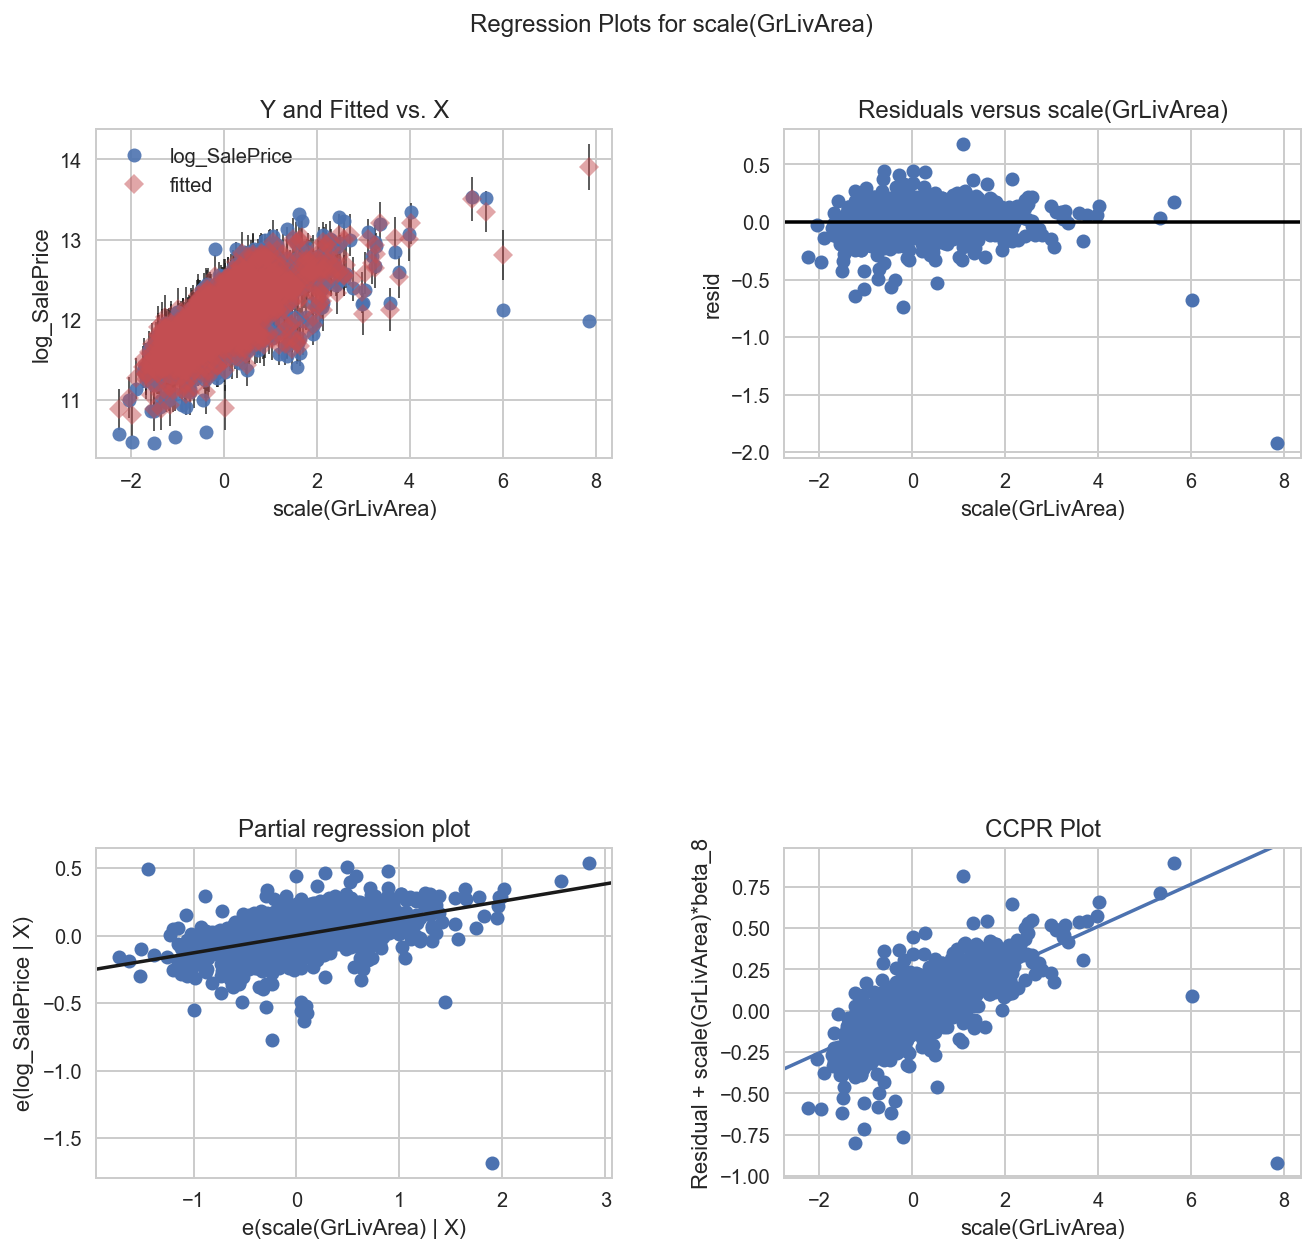

In [235]:
LinearRegExo(df_train, makeScaleFormula("log_SalePrice", scale_list, nonscale_list, True), "scale(GrLivArea)")

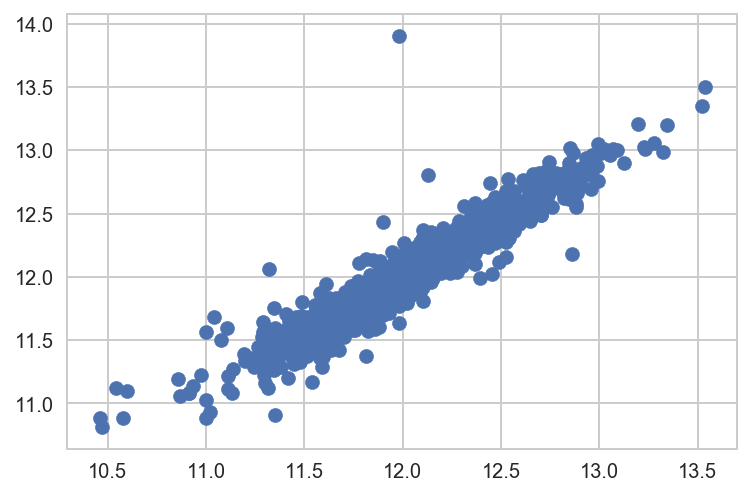

In [236]:
LinearReg(df_train, makeScaleFormula("log_SalePrice", scale_list, nonscale_list, True))

In [237]:
df_test = pd.read_csv('C:/Users/user/Desktop/newww/house-prj/test.csv')

In [238]:
# missing value 처리

# df_train.loc[1379, "Electrical"] = "SBrkr"

df_test["MasVnrType"].fillna("NA", inplace = True)
df_test["MasVnrArea"].fillna(0, inplace = True)

df_test["BsmtQual"].fillna("NA", inplace = True)
df_test["BsmtCond"].fillna("NA", inplace = True)
df_test["BsmtFinType1"].fillna("NA", inplace = True)
df_test["BsmtFinType2"].fillna("NA", inplace = True)
df_test["BsmtExposure"].fillna("NA", inplace = True)
# df_train.loc[332, "BsmtFinType2"] = "Rec"
# df_train.loc[948, "BsmtExposure"] = "No"

df_test["PoolQC"].fillna("NA", inplace = True)

df_test["MiscFeature"].fillna("NA", inplace = True)

df_test["Alley"].fillna("NA", inplace = True)

df_test["Fence"].fillna("NA", inplace = True)

df_test["FireplaceQu"].fillna("NA", inplace = True)

df_test['GarageYrBlt'].fillna("NA", inplace = True)
df_test["GarageType"].fillna("NA", inplace = True)
df_test["GarageFinish"].fillna("NA", inplace = True)
df_test["GarageQual"].fillna("NA", inplace = True)
df_test["GarageCond"].fillna("NA", inplace = True)

df_test['Utilities'].fillna("NA", inplace=True)
isnullLotFrontage = df_test["LotFrontage"].isnull()
sqrtLotArea = np.sqrt(df_test.loc[isnullLotFrontage].LotArea)
df_test.loc[isnullLotFrontage, "LotFrontage"] = np.sqrt(df_test.loc[isnullLotFrontage, "LotArea"])

In [239]:
df_test['MSSubClass'] = df_test.MSSubClass.astype('category')
df_test['MoSold'] = df_test.MSSubClass.astype('category')
df_test['GarageYrBlt'] = df_test.MSSubClass.astype('category')
df_test['YrSold'] = df_test.MSSubClass.astype('category')

In [240]:
# Converting categorical data with non-numerical features with rank inro orinal categories
df_test['ExterQual'] = df_test.ExterQual.replace(dict(Ex=5, Gd=4, TA=3, Fa=2))
df_test['ExterCond'] = df_test.ExterCond.replace(dict(Ex=5, Gd=4, TA=3, Fa=2, Po=1))
df_test['BsmtQual'] = df_test.BsmtQual.replace(dict(Ex=5, Gd=4, TA=3, Fa=2, NA=0))
df_test['BsmtCond'] = df_test.BsmtCond.replace(dict(Ex=5, Gd=4, TA=3, Fa=2, Po=1, NA=0))
df_test['BsmtExposure'] = df_test.BsmtExposure.replace(dict(Gd=5, Av=4, Mn=3, No=2, NA=0))
df_test['BsmtFinType1'] = df_test.BsmtFinType1.replace(dict(GLQ=6, ALQ=5, BLQ=4, Rec=3, LwQ=2, Unf=1, NA=0))
df_test['BsmtFinType2'] = df_test.BsmtFinType2.replace(dict(GLQ=6, ALQ=5, BLQ=4, Rec=3, LwQ=2, Unf=1, NA=0))
df_test['HeatingQC'] = df_test.HeatingQC.replace(dict(Ex=5, Gd=4, TA=3, Fa=2, Po=1))
df_test['KitchenQual'] = df_test.KitchenQual.replace(dict(Ex=5, Gd=4, TA=3, Fa=2, Po=1))
df_test['Functional'] = df_test.Functional.replace(dict(Typ=8, Min1=7, Min2=6, Mod=5, Maj1=4, Maj2=3, Sev=2, Sal=1))
df_test['FireplaceQu'] = df_test.FireplaceQu.replace(dict(Ex=5, Gd=4, TA=3, Fa=2, Po=1, NA=0))
df_test['GarageCond'] = df_test.GarageCond.replace(dict(Ex=5, Gd=4, TA=3, Fa=2, Po=1, NA=0))
df_test['GarageQual'] = df_test.GarageQual.replace(dict(Ex=5, Gd=4, TA=3, Fa=2, Po=1, NA=0))
df_test['PoolQC'] = df_test.PoolQC.replace(dict(Ex=5, Gd=4, TA=3, Fa=2, NA=0))
df_test['Fence'] = df_test.Fence.replace(dict(GdPrv=5, MnPrv=4, GdWo=3, MnWw=2, NA=0))
df_test['Alley'] = df_test.Alley.replace(dict(Grvl=2, Pave=1, NA=0))
df_test['LotShape'] = df_test.LotShape.replace(dict(Reg=4, IR1=3, IR2=2, IR3=1))
df_test['LotConfig'] = df_test.LotConfig.replace(dict(Inside=5, Corner=4, CulDSac=3, FR2=2, FR3=1))
df_test['LandContour'] = df_test.LandContour.replace(dict(Lvl=4, Bnk=3, HLS=2, Low=1))
df_test['LandSlope'] = df_test.LandSlope.replace(dict(Gtl=3, Mod=2, Sev=1))

In [241]:
df_test['TotalBath'] = df_test[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].sum(axis=1)
df_test['PorchArea'] = df_test[["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]].sum(axis = 1)

In [242]:
df_test = pd.get_dummies(df_test)

In [243]:
y = result1.predict(df_test)
y = np.exp(y)

df_submit = pd.DataFrame(columns=["Id", "SalePrice"])
df_submit["Id"] = df_test["Id"]
df_submit["SalePrice"] = y

df_submit.to_csv("C:/Users/user/Desktop/newww/submit.csv", index=False)